<a href="https://colab.research.google.com/github/Jayanth20/CSE-598/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

2.8.2


In [2]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data_mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = data_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape
len(train_labels)
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape
len(test_labels)


10000

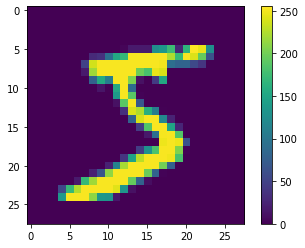

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

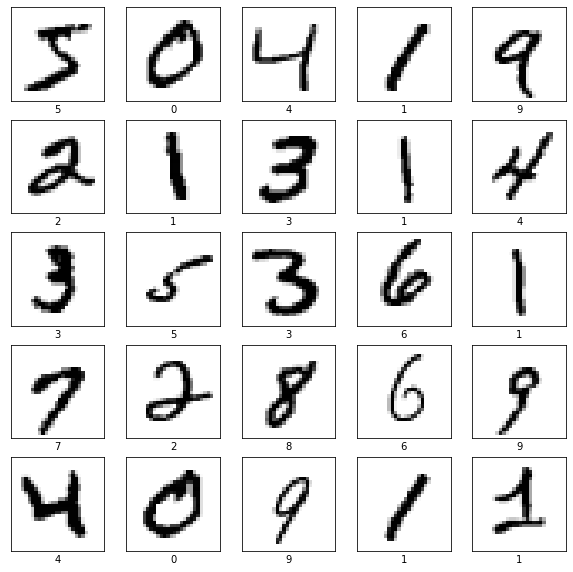

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

### Build a Model

In [9]:
from tensorflow.python import metrics
def buildModel(model_name, hidden_layers, optimizer = 'adam'):
  layers = [tf.keras.layers.Flatten(input_shape=(28, 28))] + hidden_layers + [tf.keras.layers.Dense(10)]
  model = tf.keras.Sequential(layers, name = model_name)
  model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
  return model



In [10]:
num_units = 64
models = []
for i in range(1, 4):
  model_arr = []
  for j in range(i):
    model_arr.append(tf.keras.layers.Dense(num_units, activation='relu'))
  models.append(buildModel(f"Model{i}", model_arr))



for model in models:
  model.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Model: "Model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64) 

In [11]:
obj = []
for i in range(0, 3):
  print("------------ Model ",  i , "----------------")
  obj.append(models[i].fit(train_images, train_labels, validation_split = 0.2, epochs = 10))


------------ Model  0 ----------------
Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3369 - accuracy: 0.9047 - val_loss: 0.1874 - val_accuracy: 0.9473
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1658 - accuracy: 0.9515 - val_loss: 0.1398 - val_accuracy: 0.9589
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1194 - accuracy: 0.9643 - val_loss: 0.1183 - val_accuracy: 0.9639
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0927 - accuracy: 0.9726 - val_loss: 0.1114 - val_accuracy: 0.9657
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0751 - accuracy: 0.9777 - val_loss: 0.1035 - val_accuracy: 0.9693
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0622 - accuracy: 0.9818 - val_loss: 0.0981 - val_accuracy: 0.9710
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0532 - accuracy: 0.

In [12]:
print(obj[0].history['loss'])

[0.3368522822856903, 0.1657980978488922, 0.11938156932592392, 0.0926857739686966, 0.07513993233442307, 0.06223335117101669, 0.053181737661361694, 0.04513285309076309, 0.038389649242162704, 0.03222598135471344]


In [13]:
num_layers = 3
test_accuracy_values = []
for i in range(num_layers):
  test_loss, test_acc = models[i].evaluate(test_images, test_labels)
  test_accuracy_values.append(test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.1071 - accuracy: 0.9730


In [14]:
for index, value in enumerate(test_accuracy_values):
  print("Test Accuracy of Model|", index, ":", value*100) 

Test Accuracy of Model| 0 : 97.21999764442444
Test Accuracy of Model| 1 : 96.92000150680542
Test Accuracy of Model| 2 : 97.29999899864197


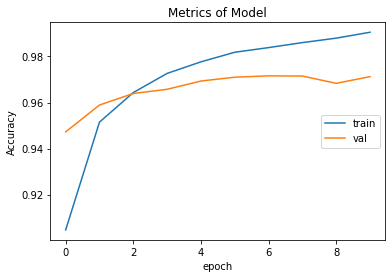

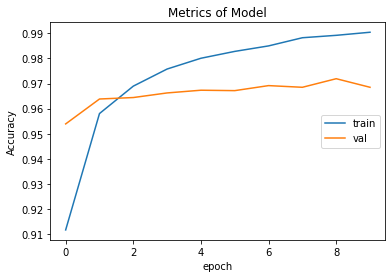

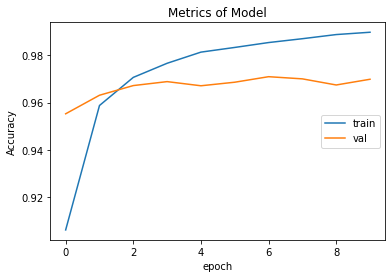

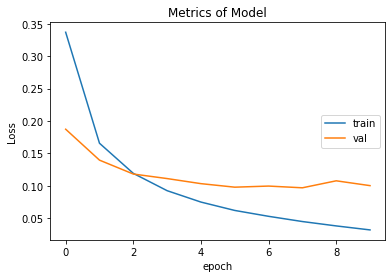

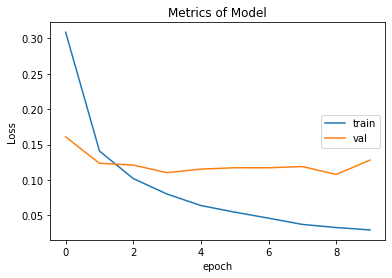

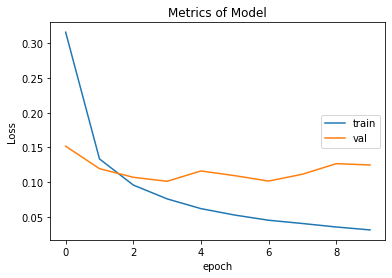

In [15]:
IMG_PATH = "/content/gdrive/MyDrive/Images/"
#Accuracy Plot
for i in range(len(models)):
  plt.clf()
  plt.plot(obj[i].history['accuracy'])
  plt.plot(obj[i].history['val_accuracy'])
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.legend(['train','val'], loc='center right')
  plt.savefig(f"{IMG_PATH}Model_{i}_Acc.png")
  plt.title('Metrics of Model')
  plt.show()
# Loss Plot
for i in range(len(models)):
  plt.clf()
  plt.plot(obj[i].history['loss'])
  plt.plot(obj[i].history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('Loss')
  plt.legend(['train','val'], loc='center right')
  plt.savefig(f"{IMG_PATH}/Model_{i}_Loss.png")
  plt.title('Metrics of Model')
  plt.show()

#### Part-2: Same Dense Layers with different number of neurons per layer

In [16]:
num_units = [2, 4, 6, 8, 10, 16, 20, 32, 64, 128]
num_layers = 3

ml_models = []

for unit in num_units:
  model_arr = []
  for i in range(num_layers):
    model_arr.append(tf.keras.layers.Dense(unit, activation = "relu"))
  ml_models.append(buildModel(f"Model_{unit}", model_arr))

for model in ml_models:
  model.summary()


Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 2)                 1570      
                                                                 
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 2)                 6         
                                                                 
 dense_12 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,612
Trainable params: 1,612
Non-trainable params: 0
_________________________________________________________________
Model: "Model_4"
________________________________________

In [17]:
obj2 = []
for i in range(len(num_units)):
  print("------------ML Model ",  i , "----------------")
  obj2.append(ml_models[i].fit(train_images, train_labels, validation_split = 0.2, epochs = 10))


------------ML Model  0 ----------------
Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3014 - accuracy: 0.1131 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3012 - accuracy: 

In [18]:
num_models = 10
test_accuracy_values_2 = []
for i in range(num_models):
  test_loss_2, test_acc_2 = ml_models[i].evaluate(test_images, test_labels)
  test_accuracy_values_2.append(test_acc_2)

313/313 [==============================] - 1s 3ms/step - loss: 0.0919 - accuracy: 0.9773


In [19]:
for index, value in enumerate(test_accuracy_values_2):
  print("Test Accuracy of Model with Same Layers and different Neurons per layer of Model", index, ":", value*100) 

Test Accuracy of Model with Same Layers and different Neurons per layer of Model 0 : 11.349999904632568
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 1 : 81.51000142097473
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 2 : 87.81999945640564
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 3 : 92.0199990272522
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 4 : 93.54000091552734
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 5 : 95.26000022888184
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 6 : 95.8899974822998
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 7 : 96.63000106811523
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 8 : 97.04999923706055
Test Accuracy of Model with Same Layers and different Neurons per layer of

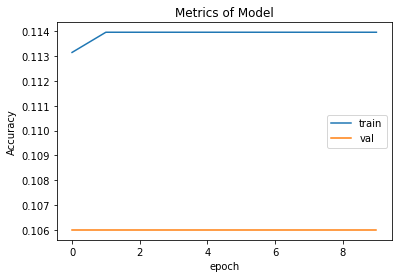

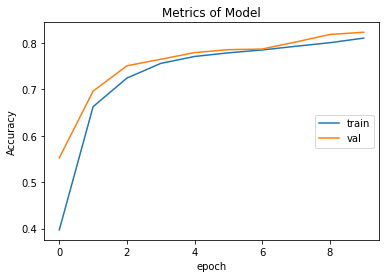

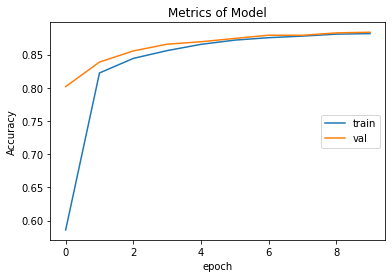

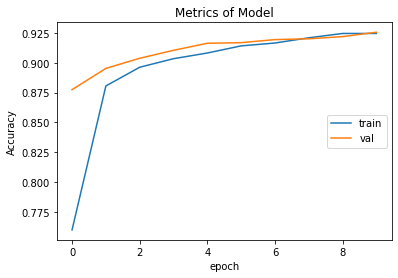

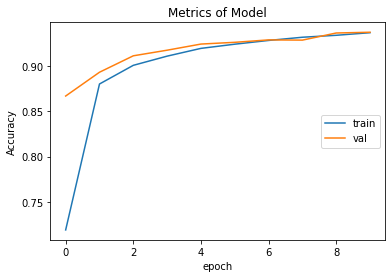

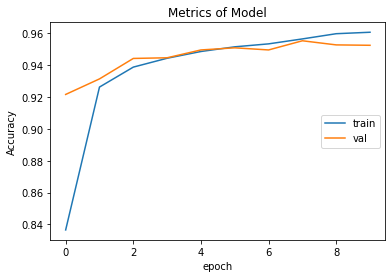

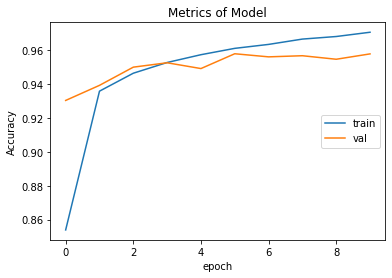

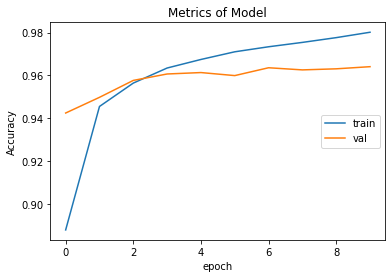

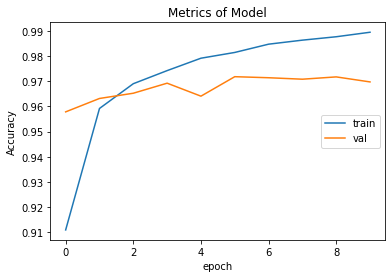

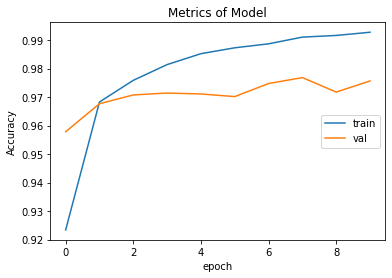

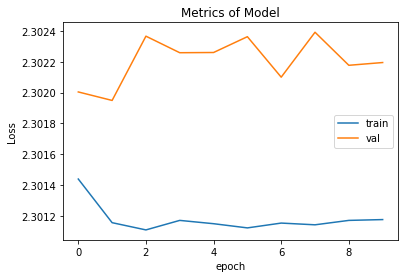

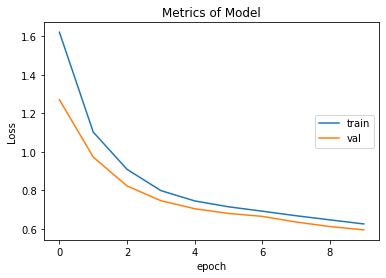

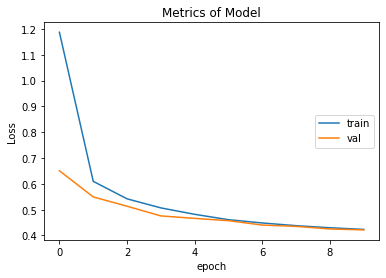

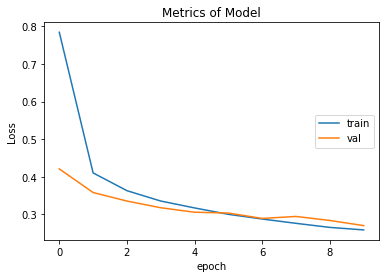

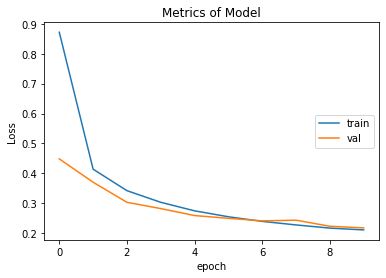

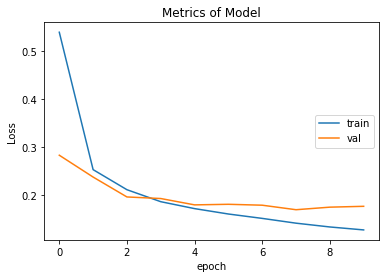

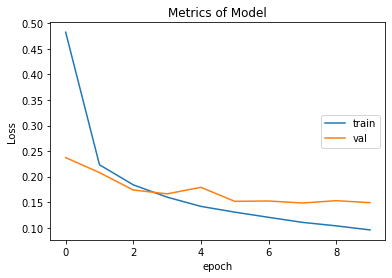

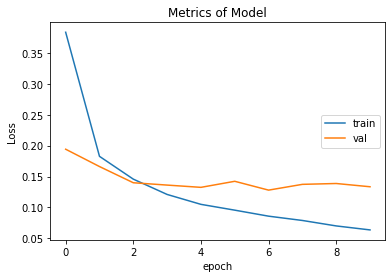

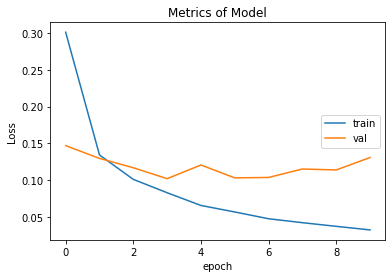

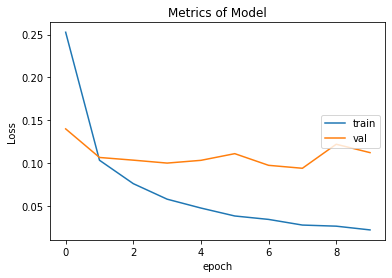

In [28]:
IMG_PATH = "/content/gdrive/MyDrive/Images/ResultsModel2/"
#Accuracy Plot
for i in range(len(ml_models)):
  plt.clf()
  plt.plot(obj2[i].history['accuracy'])
  plt.plot(obj2[i].history['val_accuracy'])
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.legend(['train','val'], loc='center right')
  plt.savefig(f"{IMG_PATH}Model_{i}_Acc.png")
  plt.title('Metrics of Model')
  plt.show()
# Loss Plot
for i in range(len(ml_models)):
  plt.clf()
  plt.plot(obj2[i].history['loss'])
  plt.plot(obj2[i].history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('Loss')
  plt.legend(['train','val'], loc='center right')
  plt.savefig(f"{IMG_PATH}/Model_{i}_Loss.png")
  plt.title('Metrics of Model')
  plt.show()

#### Part-3: Different combination of Dense Layers and Neurons

In [21]:
from itertools import permutations
Num_Dense_Layers = 4
models_part3 = []
res = []

for num_of_layers in range(1, Num_Dense_Layers + 1):
  num_neuron_units = [8 * i for i in range(1, num_of_layers + 1)]
  for p in permutations(num_neuron_units):
    name_of_model = "Custom_ML_Model_" + "_".join([str(i) for i in p])
    layers_arr = []
    for i in range(num_of_layers):
      layers_arr.append(tf.keras.layers.Dense(p[i]))
    
    models_part3.append(buildModel(name_of_model, layers_arr))


for model in models_part3:
  model.summary()

Model: "Custom_ML_Model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 8)                 6280      
                                                                 
 dense_50 (Dense)            (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________
Model: "Custom_ML_Model_8_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_51 (Dense)

In [22]:
print(len(models_part3))

33


In [23]:
obj3 = []
for i in range(len(models_part3)):
  print("------------ML Model ",  i , "----------------")
  obj3.append(models_part3[i].fit(train_images, train_labels, validation_split = 0.2, epochs = 10))


------------ML Model  0 ----------------
Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5757 - accuracy: 0.8388 - val_loss: 0.3484 - val_accuracy: 0.9003
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3307 - accuracy: 0.9056 - val_loss: 0.3029 - val_accuracy: 0.9156
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3073 - accuracy: 0.9132 - val_loss: 0.2914 - val_accuracy: 0.9191
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2966 - accuracy: 0.9166 - val_loss: 0.2831 - val_accuracy: 0.9222
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2906 - accuracy: 0.9170 - val_loss: 0.2822 - val_accuracy: 0.9219
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2855 - accuracy: 0.9197 - val_loss: 0.2843 - val_accuracy: 0.9224
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2815 - accuracy: 

In [26]:
print(len(models_part3))

33


In [27]:
test_accuracy_values_3 = []
for i in range(len(models_part3)):
  test_loss_3, test_acc_3 = models_part3[i].evaluate(test_images, test_labels)
  test_accuracy_values_3.append(test_acc_3)

313/313 [==============================] - 1s 3ms/step - loss: 0.2920 - accuracy: 0.9174


In [30]:
for index, value in enumerate(test_accuracy_values_3):
  print("Test Accuracy of Model with Same Layers and different Neurons per layer of Model", index, ":", value*100) 

Test Accuracy of Model with Same Layers and different Neurons per layer of Model 0 : 91.99000000953674
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 1 : 91.93000197410583
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 2 : 91.87999963760376
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 3 : 91.62999987602234
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 4 : 92.05999970436096
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 5 : 92.18999743461609
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 6 : 92.11000204086304
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 7 : 91.78000092506409
Test Accuracy of Model with Same Layers and different Neurons per layer of Model 8 : 91.430002450943
Test Accuracy of Model with Same Layers and different Neurons per layer of 

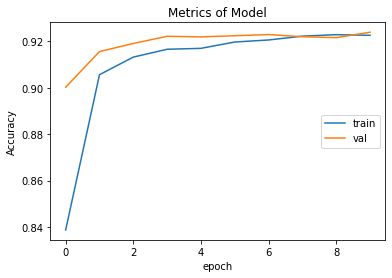

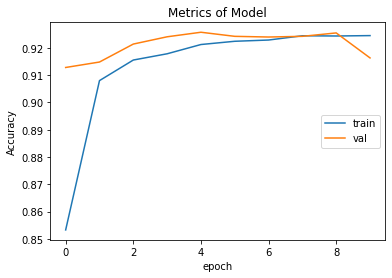

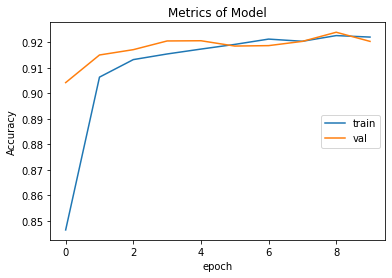

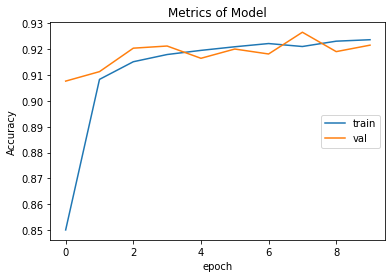

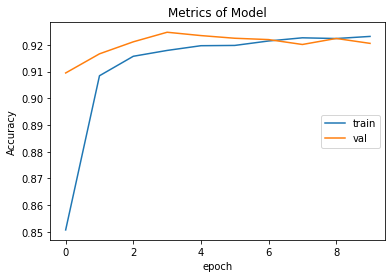

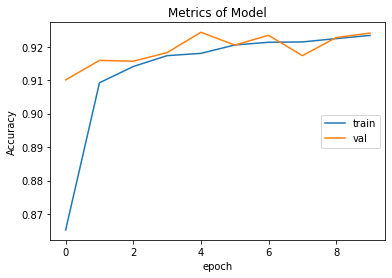

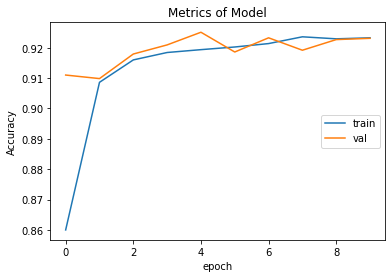

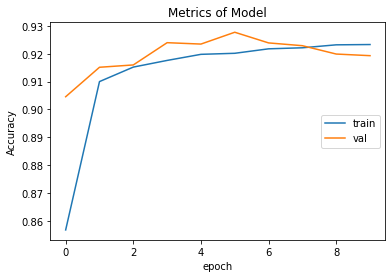

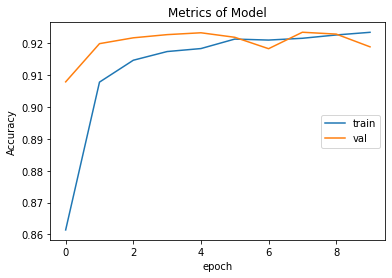

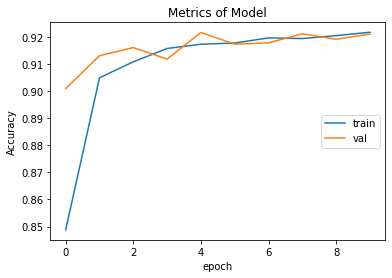

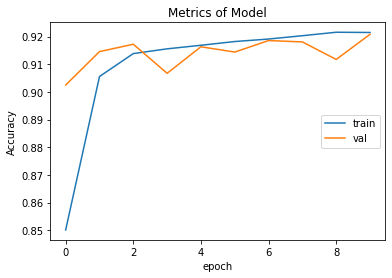

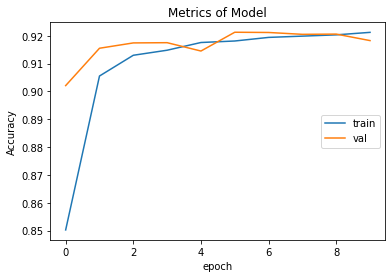

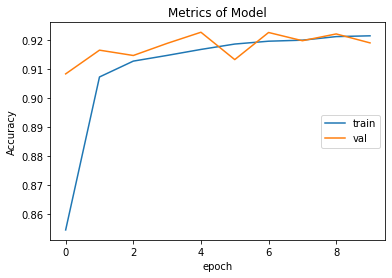

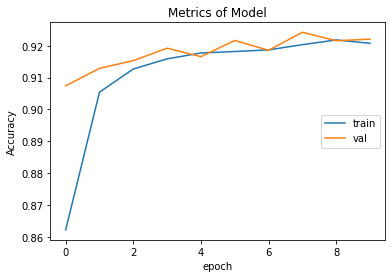

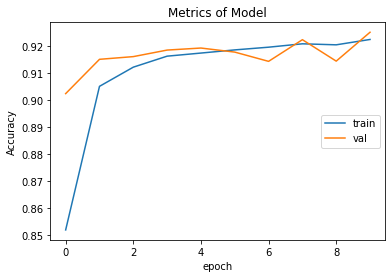

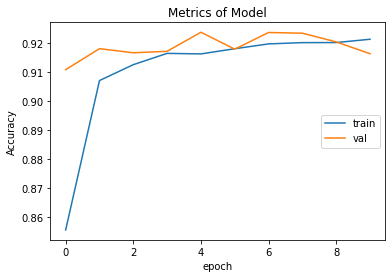

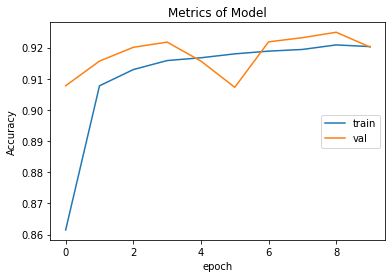

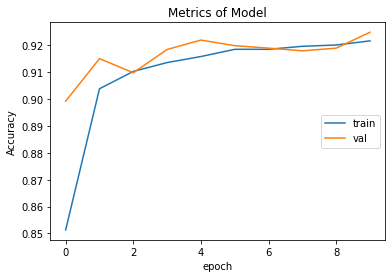

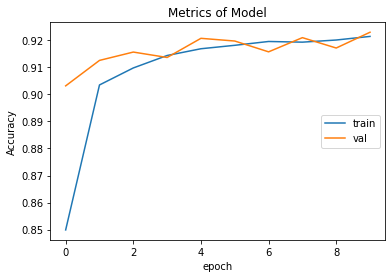

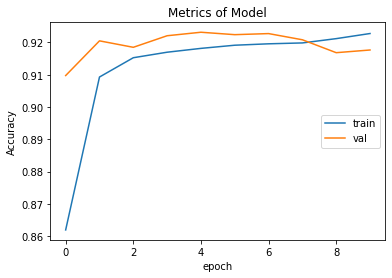

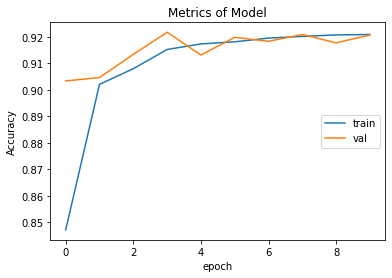

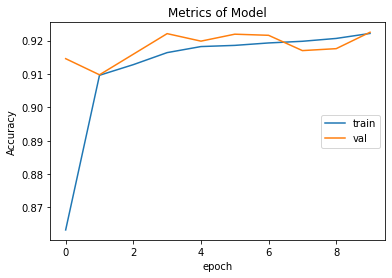

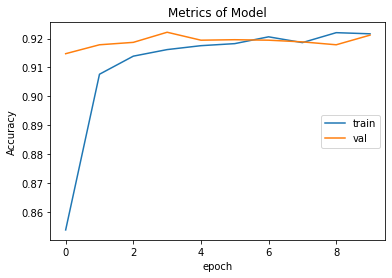

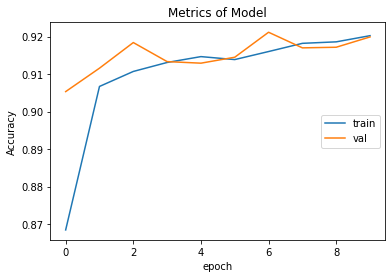

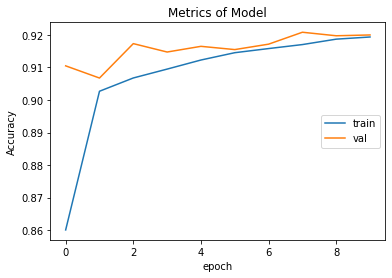

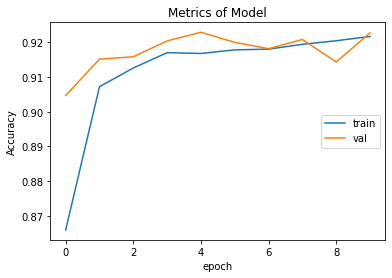

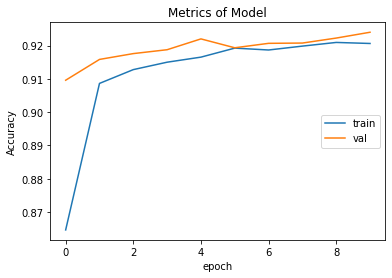

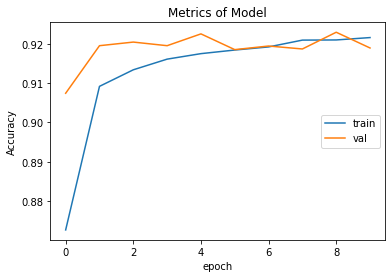

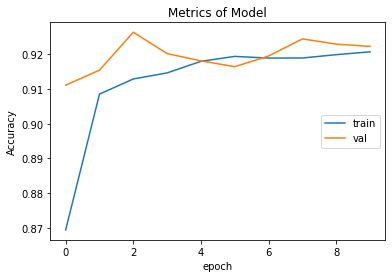

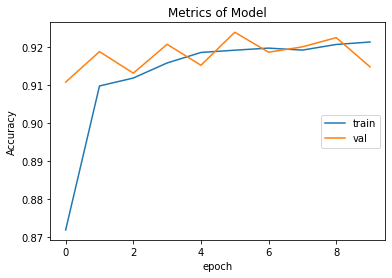

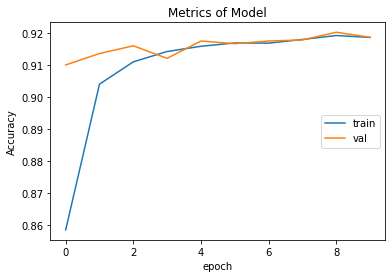

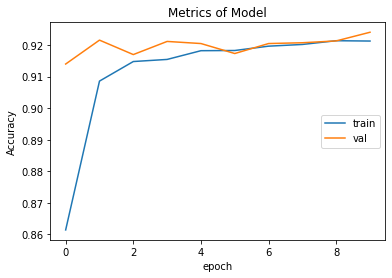

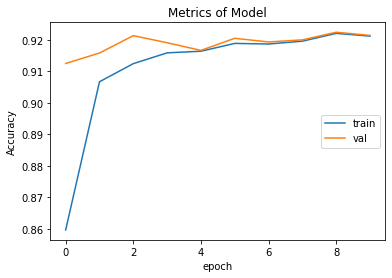

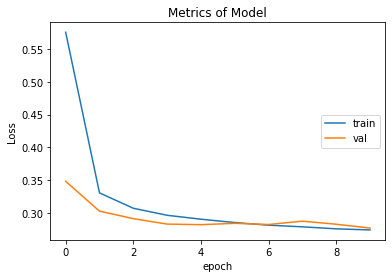

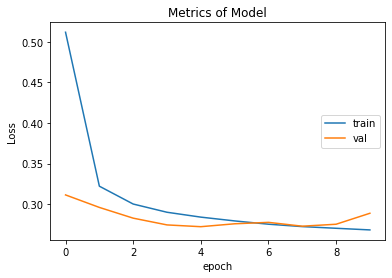

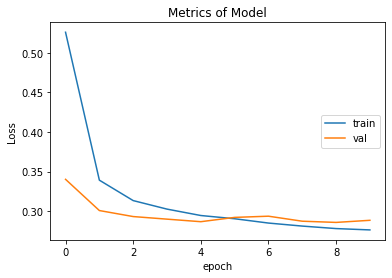

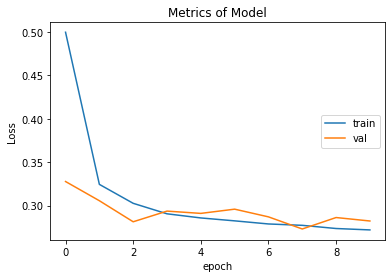

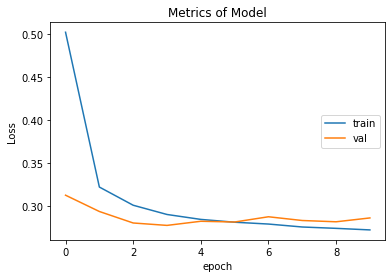

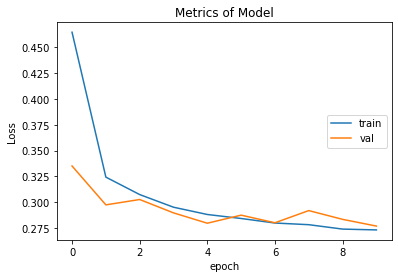

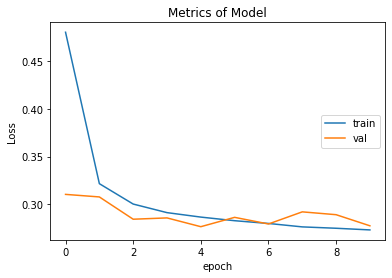

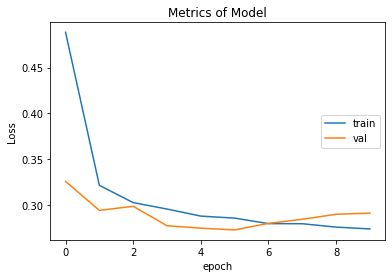

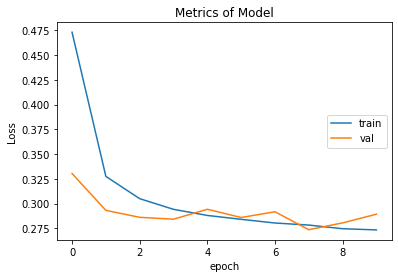

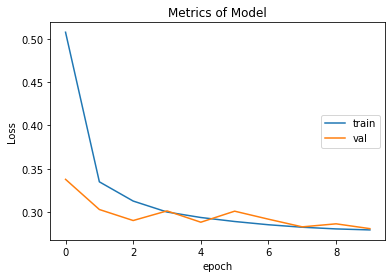

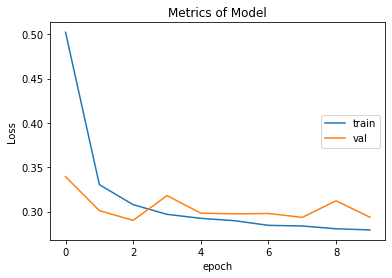

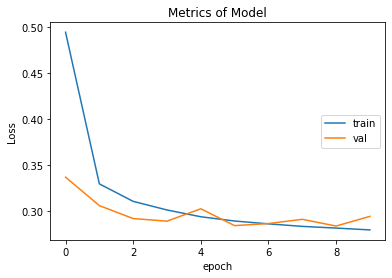

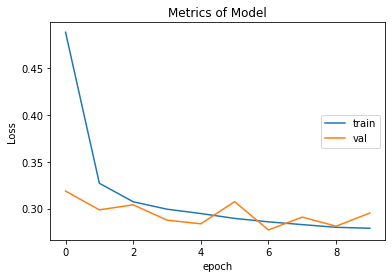

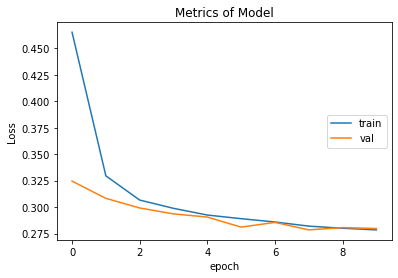

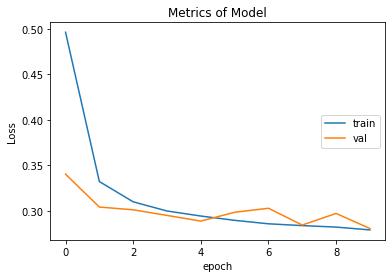

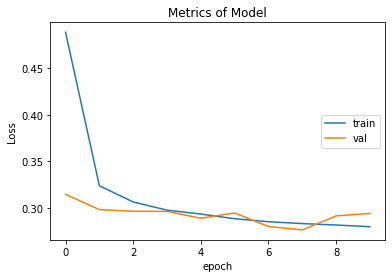

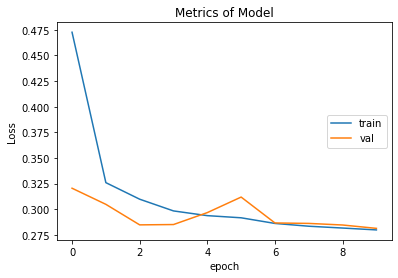

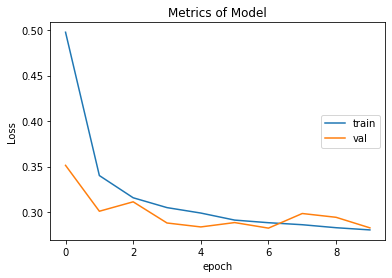

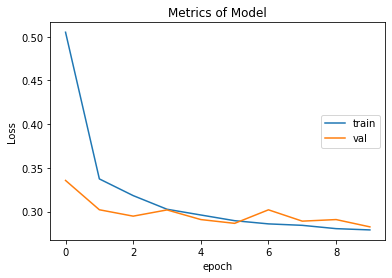

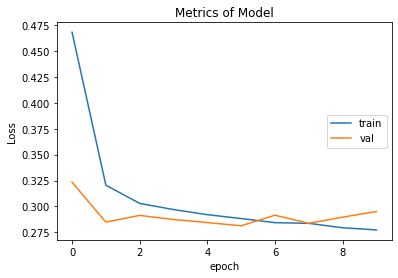

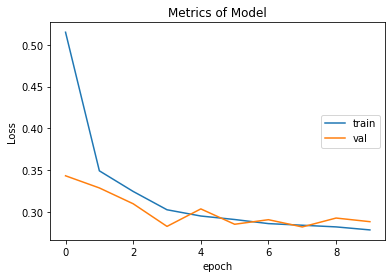

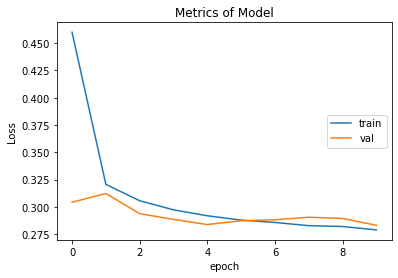

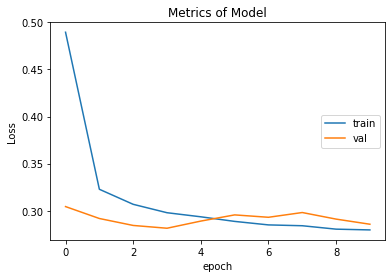

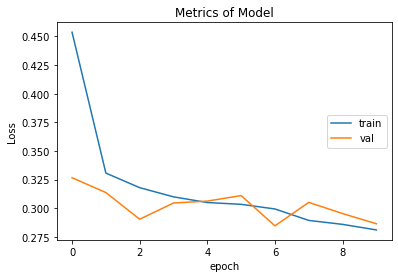

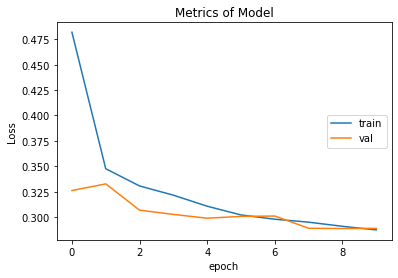

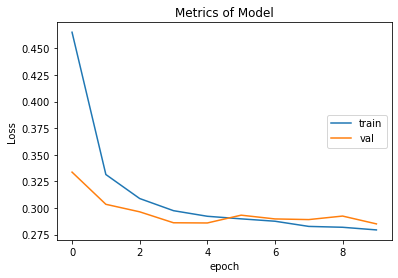

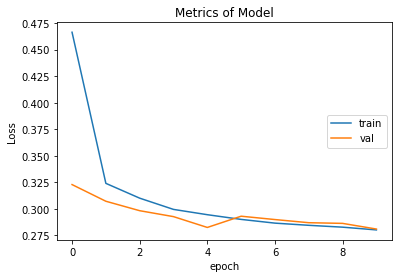

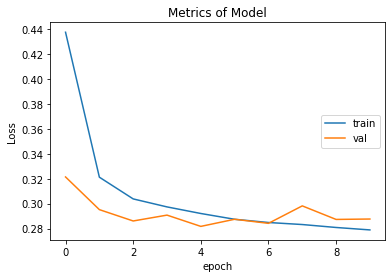

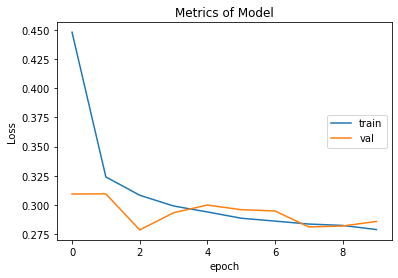

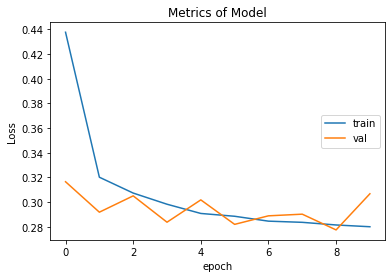

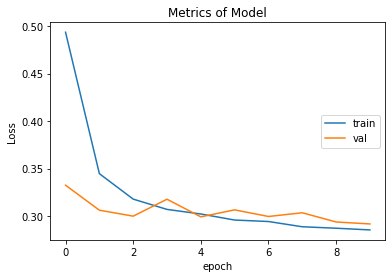

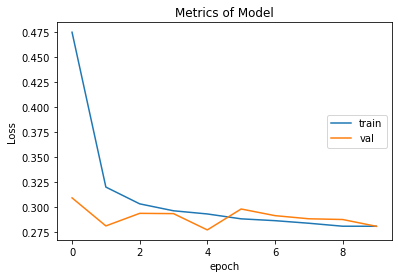

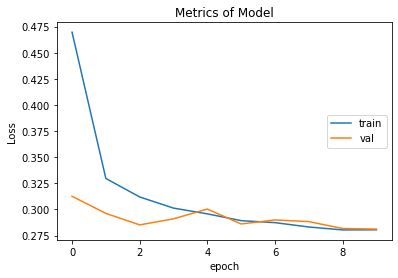

In [31]:
IMG_PATH = "/content/gdrive/MyDrive/Images/ResultsModel3/"
#Accuracy Plot
for i in range(len(models_part3)):
  plt.clf()
  plt.plot(obj3[i].history['accuracy'])
  plt.plot(obj3[i].history['val_accuracy'])
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.legend(['train','val'], loc='center right')
  plt.savefig(f"{IMG_PATH}Model_{i}_Acc.png")
  plt.title('Metrics of Model')
  plt.show()
# Loss Plot
for i in range(len(models_part3)):
  plt.clf()
  plt.plot(obj3[i].history['loss'])
  plt.plot(obj3[i].history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('Loss')
  plt.legend(['train','val'], loc='center right')
  plt.savefig(f"{IMG_PATH}/Model_{i}_Loss.png")
  plt.title('Metrics of Model')
  plt.show()

In [ ]:
probability_model = tf.keras.Sequential([models[1], 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

In [ ]:
np.argmax(predictions[0])
test_labels[0]

7